# Intro to Pandas Library

The `pandas` library is a library built largely emulating the functionality of R dataframes and the ggplot library. It works very well with `numpy` and it's very useful to understand how to read-in data into a dataframe, drop or add data to an existing dataframe, cross-reference or subset data, and plot and manipulate your data. This lesson will give you a basic overview.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Numpy arrays to dataframe

Like the `numpy` library, `pandas` has it's own native data structures:

* **Series** is for one-dimensional data. A single series is equivalent to one column. 

In [101]:
apples = np.array([5.5,6.5,7.9,5.7,6.8,8.1])
apples

array([5.5, 6.5, 7.9, 5.7, 6.8, 8.1])

In [3]:
app = pd.Series(apples)
app

0    5.5
1    6.5
2    7.9
3    5.7
4    6.8
5    8.1
dtype: float64

A Series can be treated much like a numpy array. It is both iterable but capable of vectorized operations. For instance, we can do arithmetic with scalar values applied accross the entire Series; we can compute sums, means, or custom-defined functions; 

In [4]:
# add one to all values
app + 1

0    6.5
1    7.5
2    8.9
3    6.7
4    7.8
5    9.1
dtype: float64

In [5]:
# compute the Series mean
app.mean()

6.75

When we have the equivalent of multi-dimensional numpy arrays, instead of a single column we will need multiple columns. This is the pandas `DataFrame` object.

We can create a dataframe directly from a 2d numpy array:

In [102]:
fruits = np.array([[5.5,6.5,7.9,5.7,6.8,8.1],[5.1,3.4,6.5,8.8,6.3,4.9],[4.3,6.7,6.5,4.6,7.2,7.9]])

fruits.shape

(3, 6)

In [11]:
fruits.transpose()

array([[5.5, 5.1, 4.3],
       [6.5, 3.4, 6.7],
       [7.9, 6.5, 6.5],
       [5.7, 8.8, 4.6],
       [6.8, 6.3, 7.2],
       [8.1, 4.9, 7.9]])

In [103]:
# create dataframe from ndarray
f = pd.DataFrame(fruits).transpose()
f

,0,1,2
0,5.5,5.1,4.3
1,6.5,3.4,6.7
2,7.9,6.5,6.5
3,5.7,8.8,4.6
4,6.8,6.3,7.2
5,8.1,4.9,7.9


In [104]:
# name the columns
f.columns = (['apples','bananas','oranges'])

In [105]:
f

,apples,bananas,oranges
0,5.5,5.1,4.3
1,6.5,3.4,6.7
2,7.9,6.5,6.5
3,5.7,8.8,4.6
4,6.8,6.3,7.2
5,8.1,4.9,7.9


In [16]:
type(f)

pandas.core.frame.DataFrame

Pandas `describe` function is a useful function for gathering summary statistics for your columns of data

In [63]:
f.describe()

,apples,bananas,oranges,pears
count,12.000000,12.000000,12.000000,12.000000
mean,5.566667,5.333333,5.883333,6.675000
std,1.542332,1.464323,1.183856,0.677059
min,3.300000,3.400000,4.000000,5.900000
25%,4.475000,4.450000,5.050000,6.175000
50%,5.600000,5.000000,5.950000,6.500000
75%,6.575000,6.325000,6.550000,6.925000
max,8.100000,8.800000,7.900000,8.200000


## Built-in Plotting Capabilities

Pandas uses `matplotlib` "under the hood" to allow some simple built-in graphing capabilities.

For instance, we can plot the entire dataframe at once. We can plot over indicies (useful if you have time-series data, for example)

<AxesSubplot:>

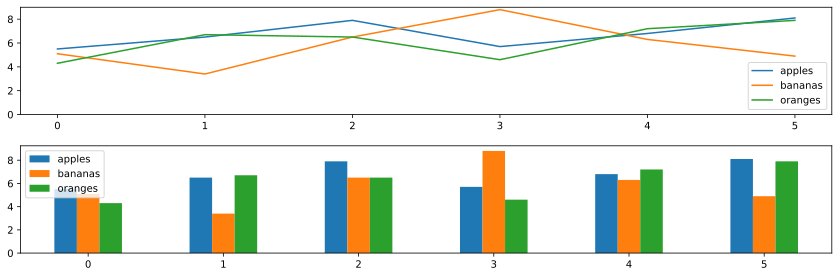

In [20]:
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
plt.tight_layout()
f.plot(ax=ax1, ylim=(0,9))
f.plot.bar(ax=ax2, rot=0) #By default pandas bar plot will put your x-labels on their sides. Use rot=0 to fix it.

... we can compare the medians (or means) and standard deviations of columns...
(read more about `pandas.DataFrame.boxplot` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?highlight=boxplot#pandas.DataFrame.boxplot))

<AxesSubplot:>

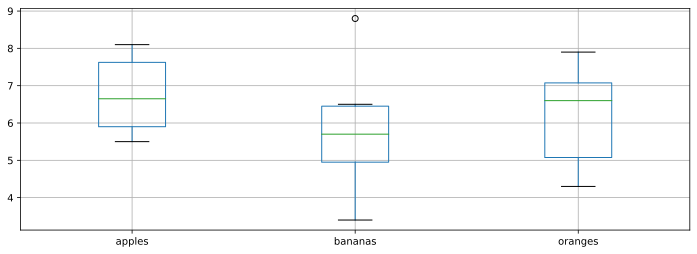

In [22]:
# a boxplot 
f.boxplot()

As we will see, it is common when evaluating musical datasets to have each row be a separate observation (e.g., a song) and each column represent a different musical feature or partial feature.

# Creating new columns

It is typically useful when doing modeling to have dataframes that are longer than they are wide. This is called a "long form" dataframe. This is because it is typically useful in both computational and perception work to have features or variables stored as columns. You can have as many columns as you want in a dataframe. It is very easy to create subsets and ignore or "throw out" data later on. 

Creating a new column to an existing dataframe is simple so long as the new column has the same number of rows as the preexisting dataframe. (Note that Pandas has many capabilities for joining and merging dataframes that we won't get into here.)

In [23]:
apples.size

6

In [24]:
# create Series of same length
pears = pd.Series([6.5,6.1,8.2,7.5,7.3,6.4])

In [25]:
# add new column to dataframe
f['pears'] = pears

In [26]:
f

,apples,bananas,oranges,pears
0,5.5,5.1,4.3,6.5
1,6.5,3.4,6.7,6.1
2,7.9,6.5,6.5,8.2
3,5.7,8.8,4.6,7.5
4,6.8,6.3,7.2,7.3
5,8.1,4.9,7.9,6.4


Sometimes you would like to have a single column label for all the data in a dataframe (or subset) because you will later append it to a different dataframe. This is as simple as creating a label for the column and giving a default value:

In [27]:
f['farm'] = 'McDonald'
f

,apples,bananas,oranges,pears,farm
0,5.5,5.1,4.3,6.5,McDonald
1,6.5,3.4,6.7,6.1,McDonald
2,7.9,6.5,6.5,8.2,McDonald
3,5.7,8.8,4.6,7.5,McDonald
4,6.8,6.3,7.2,7.3,McDonald
5,8.1,4.9,7.9,6.4,McDonald


Notice what happens if we tried now to plot our dataframe, now that each row has both floating point and string data:

<AxesSubplot:>

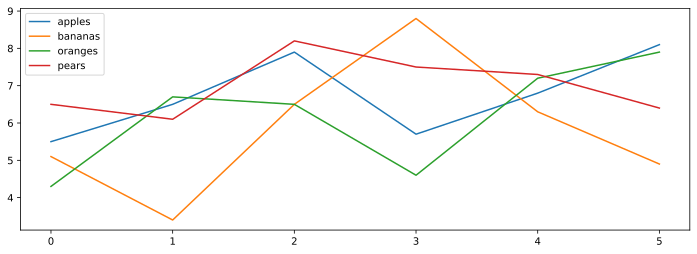

In [28]:
f.plot()

# Dataframes from dictionaries

Pandas dataframes can also be read in from python dictionaries. E.g., 

In [29]:
fr = {'apples':[3.3,4.5,5.7,4.7,3.7,4.4], 'bananas': [4.5,3.9,6.4,5.1,4.8,4.3], 
      'oranges':[4.0,5.9,6.0,6.5,5.2,5.8], 'pears':[6.8,6.6,6.2,6.1,5.9,6.5]}

In [30]:
fruits2 = pd.DataFrame(fr)
fruits2

,apples,bananas,oranges,pears
0,3.3,4.5,4.0,6.8
1,4.5,3.9,5.9,6.6
2,5.7,6.4,6.0,6.2
3,4.7,5.1,6.5,6.1
4,3.7,4.8,5.2,5.9
5,4.4,4.3,5.8,6.5


let's say this data came from a different farm:

In [33]:
fruits2['farm'] = 'FarmerJohn'
fruits2

,apples,bananas,oranges,pears,farm
0,3.3,4.5,4.0,6.8,FarmerJohn
1,4.5,3.9,5.9,6.6,FarmerJohn
2,5.7,6.4,6.0,6.2,FarmerJohn
3,4.7,5.1,6.5,6.1,FarmerJohn
4,3.7,4.8,5.2,5.9,FarmerJohn
5,4.4,4.3,5.8,6.5,FarmerJohn


Perhaps we would like to know which farm produces better crops? In this case, lets imagine that each row represents an average size fruit from each of their plots.

Let's combine these into a single dataframe:

In [36]:
f = f.append(fruits2)
f

,apples,bananas,oranges,pears,farm
0,5.5,5.1,4.3,6.5,McDonald
1,6.5,3.4,6.7,6.1,McDonald
2,7.9,6.5,6.5,8.2,McDonald
3,5.7,8.8,4.6,7.5,McDonald
4,6.8,6.3,7.2,7.3,McDonald
5,8.1,4.9,7.9,6.4,McDonald
0,3.3,4.5,4.0,6.8,FarmerJohn
1,4.5,3.9,5.9,6.6,FarmerJohn
2,5.7,6.4,6.0,6.2,FarmerJohn
3,4.7,5.1,6.5,6.1,FarmerJohn


We would now like to compare the averages from Farmer John's apples to Farmer McDonald's apples. For this we need to group or subset our data.

In this case, we want to look at all the apples but grouped by farm. Whenever we want to do this and apply a single function (here it's the mean), it is useful to use pandas `groupby` and `apply` functionality.

In [41]:
apps = f['apples'].groupby(f['farm'])
apps

In [43]:
apps.apply(np.mean)

farm
FarmerJohn    4.383333
McDonald      6.750000
Name: apples, dtype: float64

We can also plot this data by looking at a boxplot:

farm
FarmerJohn    AxesSubplot(0.125,0.11;0.775x0.77)
McDonald      AxesSubplot(0.125,0.11;0.775x0.77)
Name: apples, dtype: object

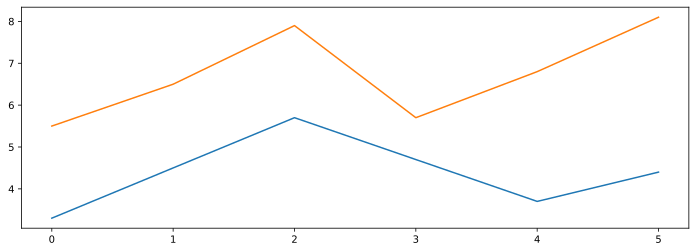

In [51]:
# groupby objects have plot capabilities too
apps.plot()

Somtimes it is easier for a simple scenario *not* to use groupby:

<AxesSubplot:title={'center':'apples'}, xlabel='farm'>

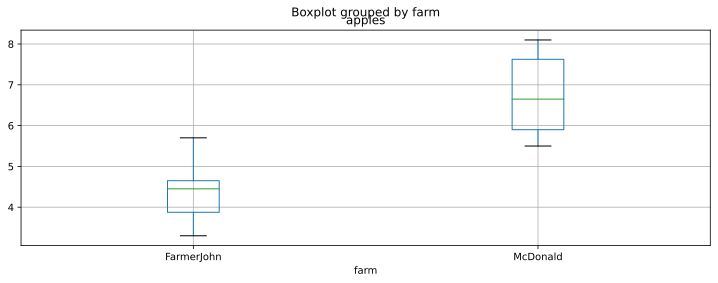

In [53]:
f.boxplot("apples", by="farm")

# Read in a dataframe

Often you will have preexisting data that you will simply read in. To do this use the appropriate read function for pandas. Most commonly `read.csv`

In [55]:
flowers = pd.read_csv('iris.csv')
flowers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Pandas `loc` and `iloc`

pandas `loc` and `iloc` functions are useful for calling rows and columns by position and name. Generally, iLoc is for index location, while loc is useful with label names.

In [99]:
# first row of data and 3rd through 5th columns
flowers.iloc[0, 2:5]

Petal.Length       1.4
Petal.Width        0.2
Species         setosa
Name: 0, dtype: object

In [86]:
# Ditto but using names instead of numeric index location. Note the colon indicating the range of consecutive columns
flowers.loc[1, 'Petal.Length':'Species']

Petal.Length       1.4
Petal.Width        0.2
Species         setosa
Name: 1, dtype: object

In [97]:
# LOC: return all rows from 'Species' column matching query from Sepal.Length column
flowers.loc[(flowers['Sepal.Length'] >= 4.9), 'Species']

0         setosa
1         setosa
4         setosa
5         setosa
7         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 134, dtype: object

In [100]:
flowers.loc[(flowers['Sepal.Length'] >= 4.9)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
data = pd.read_csv('TitanicSurvival.csv')

#show first N rows (default = 5)
data.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


## Categorical data & counting
When you have categorical data (such as "yes"/"no" or "A","B","C", etc.) it can be useful to make use of a Series function called `value_counts()`

In [59]:
data['survived'].value_counts()

no     809
yes    500
Name: survived, dtype: int64

You can access these values as proportions by setting the argument "normalize" to True

In [62]:
data['survived'].value_counts(normalize = True)

no     0.618029
yes    0.381971
Name: survived, dtype: float64